In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Break1:

1)Given the dataframe attached "df1.csv", what is the distribution of "y"?

2)Given the dataframe attached "df2.csv", which columns contributed to creating the column "f"?

In [2]:
df1 = pd.read_csv("data/df1.csv")
df2 = pd.read_csv("data/df2.csv")

In [3]:
df1.head()

,Unnamed: 0,x,y
0,0,A,93.764711
1,1,A,109.293028
2,2,A,89.244395
3,3,A,102.749129
4,4,A,78.126267


In [15]:
df1["x"].unique()

array(['A', 'B', 'C'], dtype=object)

In [8]:
df1.describe()

,Unnamed: 0,y
count,30000.000000,30000.000000
mean,14999.500000,58.291331
std,8660.398374,39.085985
min,0.000000,-53.277312
25%,7499.750000,25.710397
50%,14999.500000,60.664025
75%,22499.250000,95.006285
max,29999.000000,145.226340


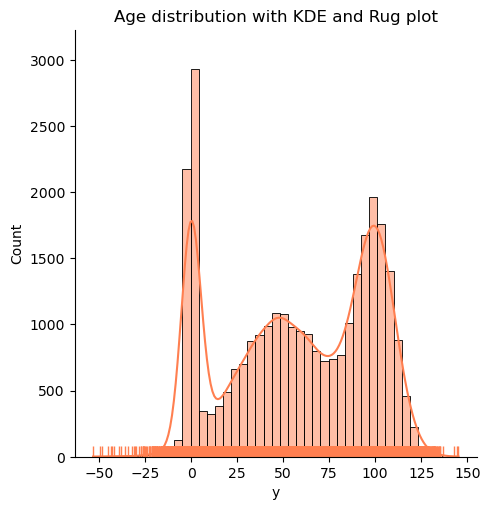

In [10]:
sns.displot(df1['y'], kde=True, rug=True, color='coral')
plt.title("Age distribution with KDE and Rug plot")
plt.show()

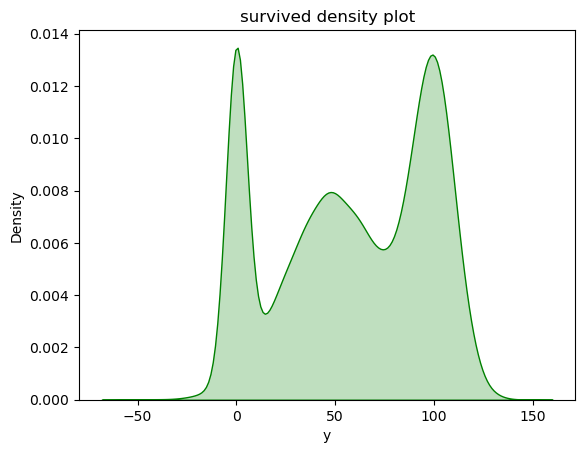

In [12]:
# KDE PLOT
sns.kdeplot(data=df1, x='y', fill=True, color='green')
plt.title("survived density plot")
plt.show()

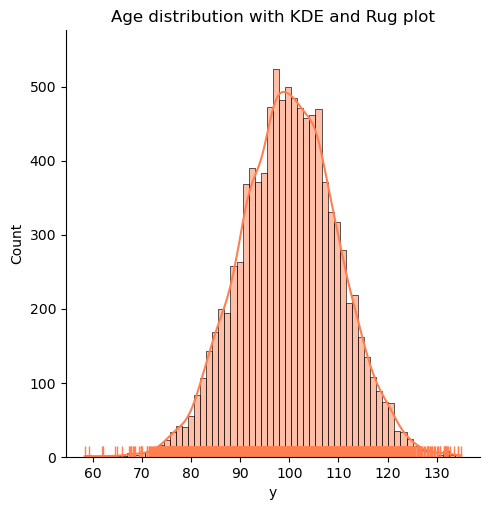

In [18]:
# uno dei picchi quindi corrsiponde quando x equivale ad A
sns.displot(df1[df1['x'] == 'A']['y'], kde=True, rug=True, color='coral')
plt.title("Age distribution with KDE and Rug plot")
plt.show()

In [4]:
df2.head()

,Unnamed: 0,a,b,c,d,x,y,z,h,g,f
0,0,-6.372794,-16.577755,48.961232,0,-0.318640,-16.259115,0,0,49.279872,50.053086
1,1,-17.485544,21.215169,49.007079,1,-0.874277,22.089446,0,0,49.881356,49.329011
2,2,-28.319169,59.144883,47.702685,0,-1.415958,60.560841,0,0,49.118644,46.193410
3,3,3.051243,-43.235331,51.225396,1,0.152562,-43.387893,0,0,51.072834,50.695365
4,4,3.945007,13.971416,50.365315,0,0.197250,13.774166,0,0,50.168065,51.094800


In [19]:
print(df2['f'].describe())

count    10000.000000
mean        50.515870
std          1.796008
min         44.057525
25%         49.319585
50%         50.506391
75%         51.703974
max         57.019264
Name: f, dtype: float64


In [20]:
corr_matrix = df2.corr()
print(corr_matrix['f'])

Unnamed: 0    0.226819
a             0.553135
b             0.005398
c             0.786402
d             0.016203
x             0.553135
y            -0.000182
z                  NaN
h             0.263446
g             0.556000
f             1.000000
Name: f, dtype: float64


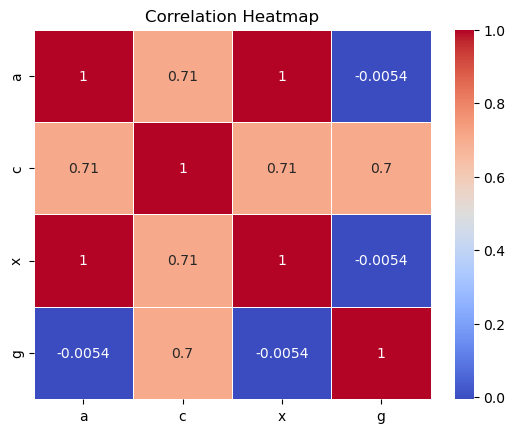

In [21]:
cols = ['a','c','x','g']
corr = df2[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

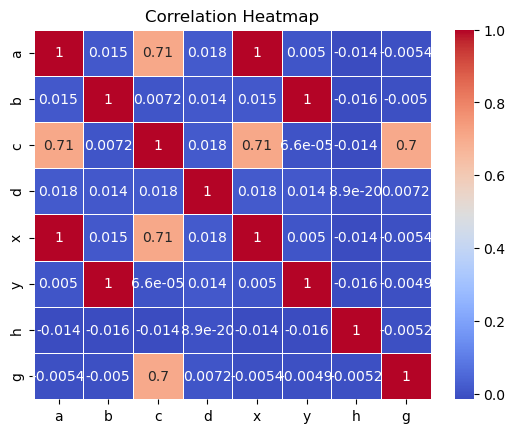

In [26]:
cols = ['a','b','c','d','x','y','h','g']
corr = df2[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Break2:

1)Plot the function y = log(x), how can you improve its plot in critical areas?

2)Recreate the following heatmaps:

<img src="image/Screenshot%202025-02-16%20alle%2021.57.55.png" alt="Drawing" style="width: 200px;"/>,
<img src="image/Screenshot%202025-02-16%20alle%2020.07.47.png" alt="Drawing" style="width: 200px;"/>,

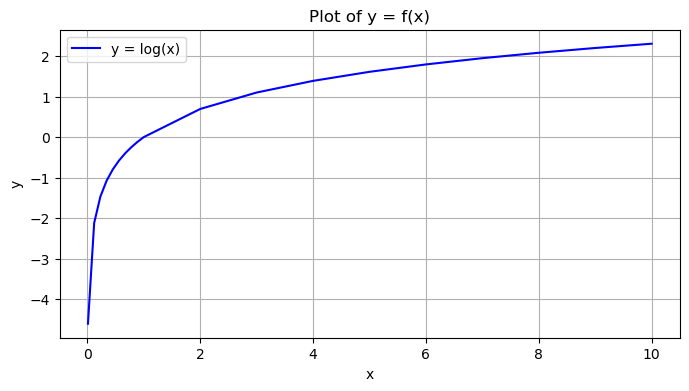

In [29]:
# Generate x values
# diciamo che voglio più punti tra 0 e 1
x = np.append(np.linspace(0.01, 1, 10), np.linspace(1, 10, 10))
# Define a function y = f(x)
y = np.log(x)
# Plot y = f(x)
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='y = log(x)', color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = f(x)')
plt.legend()
plt.grid()
plt.show()

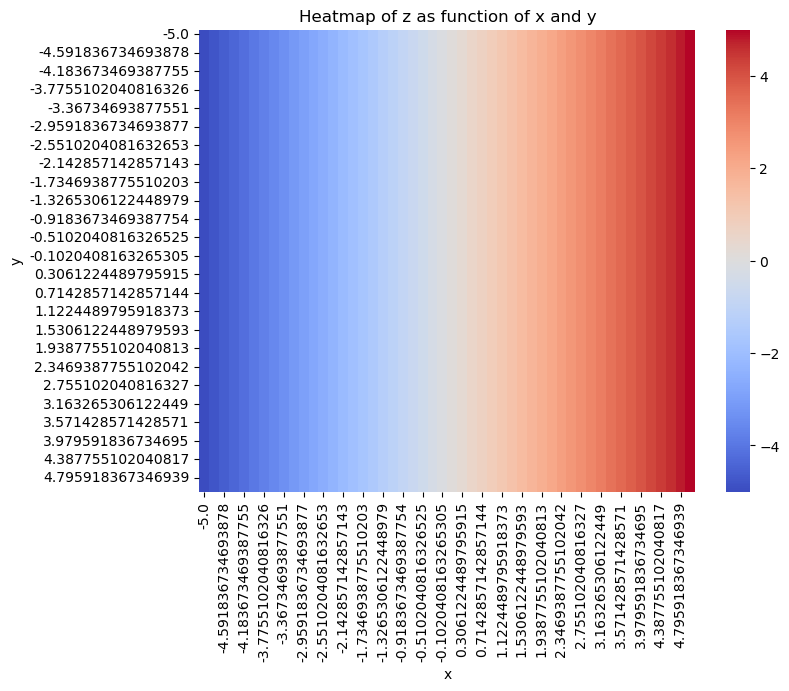

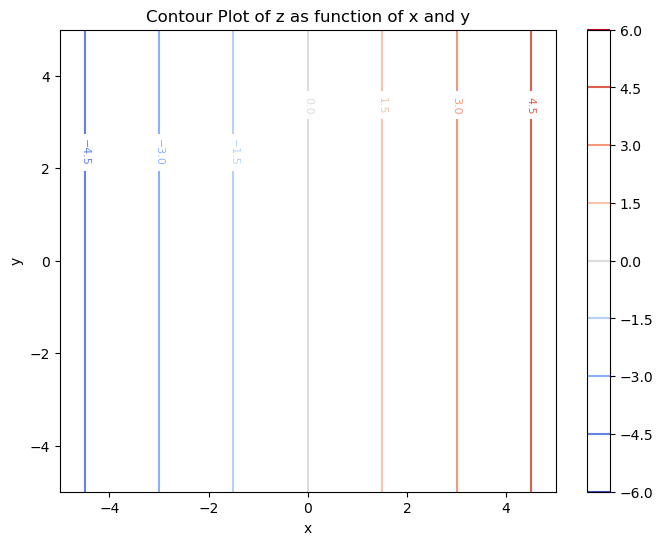

In [30]:
# Generate simulation data for heatmap
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X  # Example function

# Convert to DataFrame
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})

# Pivot the data for heatmap
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Heatmap of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

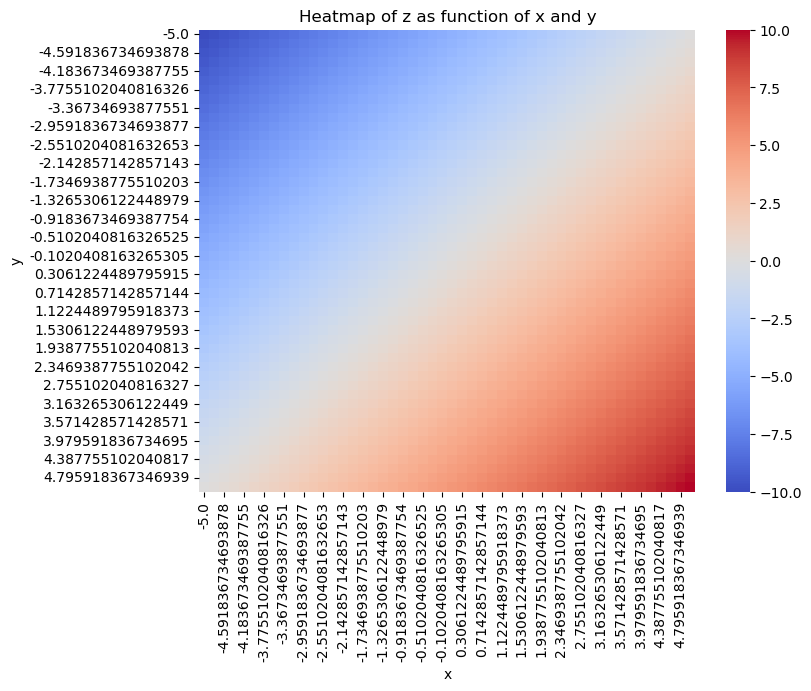

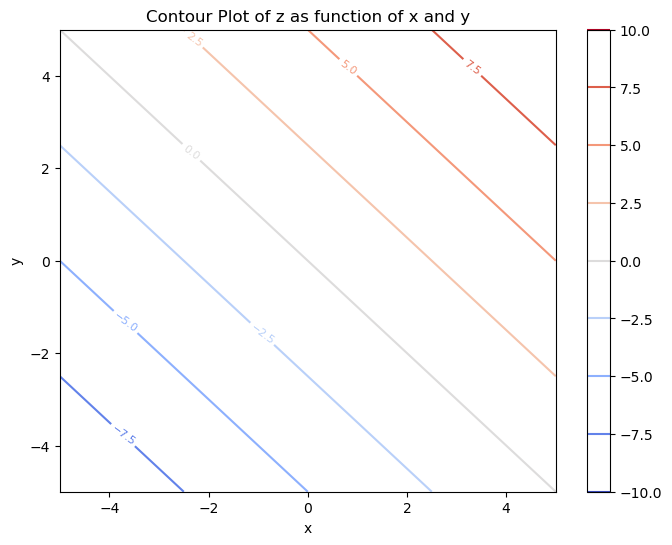

In [28]:
# Generate simulation data for heatmap
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X+Y  # Example function

# Convert to DataFrame
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})

# Pivot the data for heatmap
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Heatmap of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()